In [1]:
import numpy as np

# Lab 1

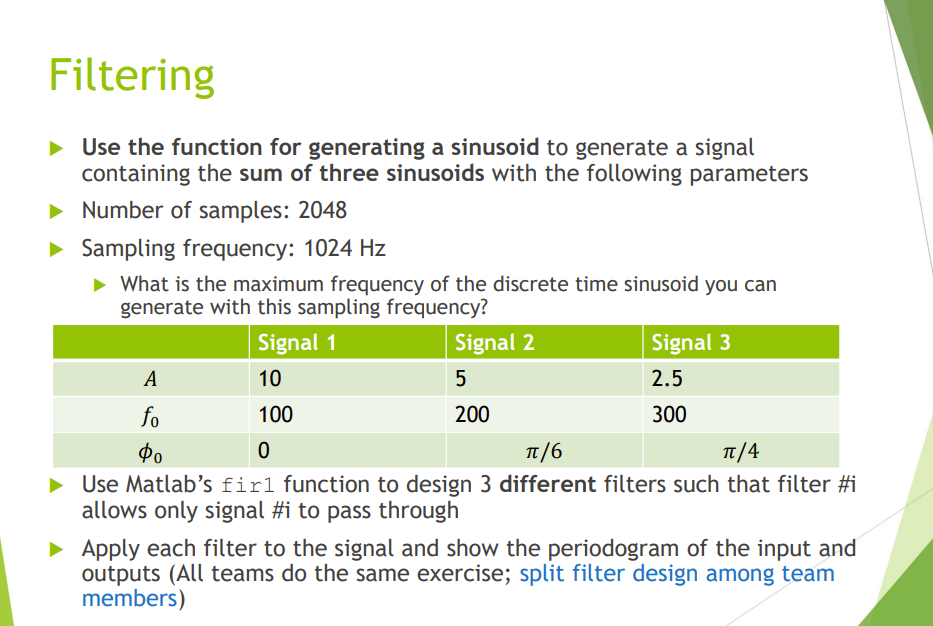

In [2]:
def gen_signal(A,f0,phi0,t):
    s=A*np.sin(2*np.pi*f0*t+phi0)
    return s
# Nyquist 频率
f_nyq=2*300
f_sam=10*300
t=np.arange(0,1,1/f_sam)
s1=gen_signal(10,100,0,t)
s2=gen_signal(5,200,np.pi/6,t)
s3=gen_signal(2.5,300,np.pi/4,t)



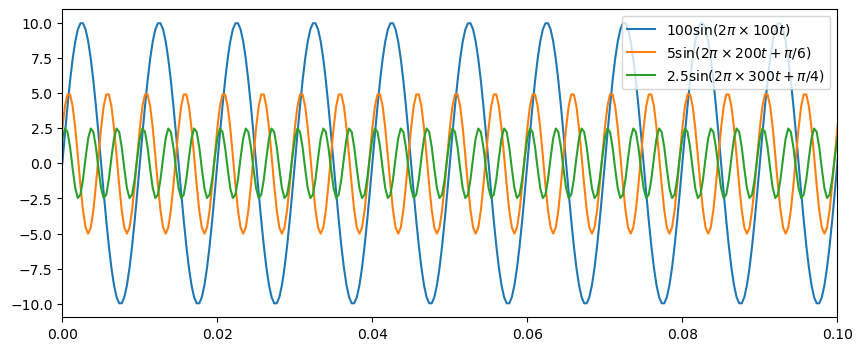

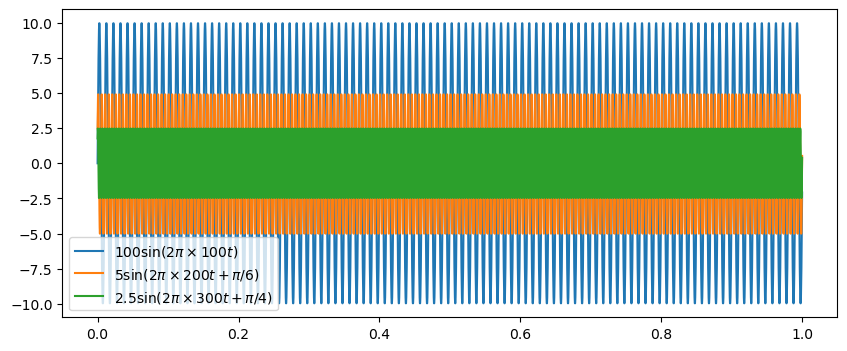

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(t,s1,label=r'$100 \sin(2 \pi\times 100 t)$')
plt.plot(t,s2,label=r'$5 \sin(2 \pi \times 200 t+\pi/6)$')
plt.plot(t,s3,label=r'$2.5 \sin(2 \pi \times 300 t+\pi/4)$')
plt.legend()
plt.xlim(0,0.1)

plt.figure(figsize=(10,4))
plt.plot(t,s1,label=r'$100 \sin(2 \pi\times 100 t)$')
plt.plot(t,s2,label=r'$5 \sin(2 \pi \times 200 t+\pi/6)$')
plt.plot(t,s3,label=r'$2.5 \sin(2 \pi \times 300 t+\pi/4)$')
plt.legend()

# 时频图

# 低通滤波器

这里假设采样频率为2048hz,信号本身最大的频率为300hz，要滤除100hz以上频率成分，即截至频率为100hz,则wn=2*100/2048

/home/sp/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


wn= 0.1


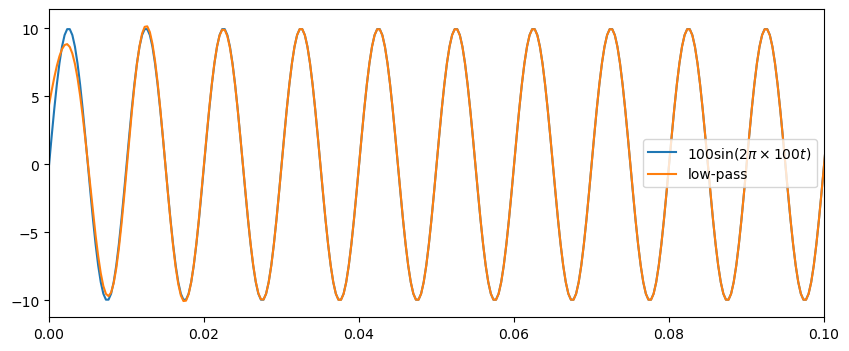

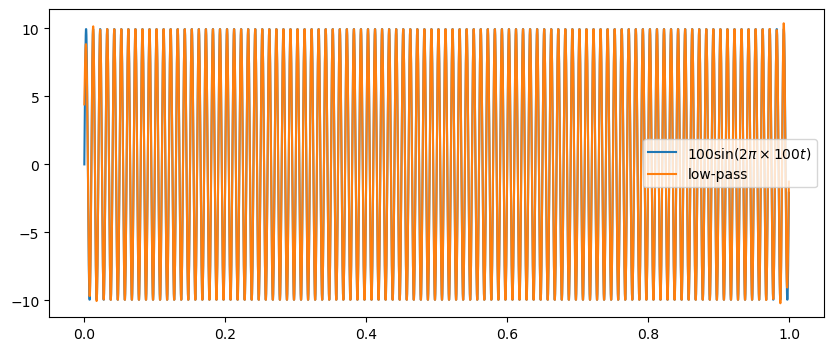

In [4]:
from   scipy  import   signal
data=s1+s2+s3
f_cutoff=150
wn=2*f_cutoff/f_sam
print('wn=',wn)
b, a  =   signal.butter( 10 , wn,  'lowpass' )    #配置滤波器 20 表示滤波器的阶数
filted_Data  =   signal.filtfilt(b, a, data)   #data为要过滤的信号


plt.figure(figsize=(10,4))
plt.plot(t,s1,label=r'$100 \sin(2 \pi\times 100 t)$')
plt.plot(t,filted_Data,label='low-pass')
plt.legend()
plt.xlim(0,0.1)


plt.figure(figsize=(10,4))
plt.plot(t,s1,label=r'$100 \sin(2 \pi\times 100 t)$')
plt.plot(t,filted_Data,label='low-pass')

plt.legend()

# 高通滤波器

(0.5, 1.0)

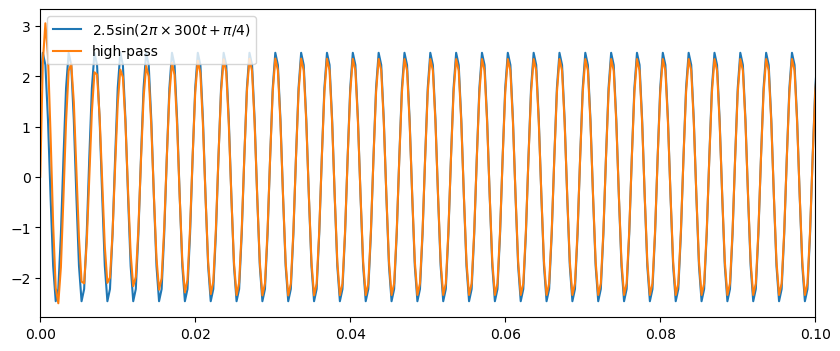

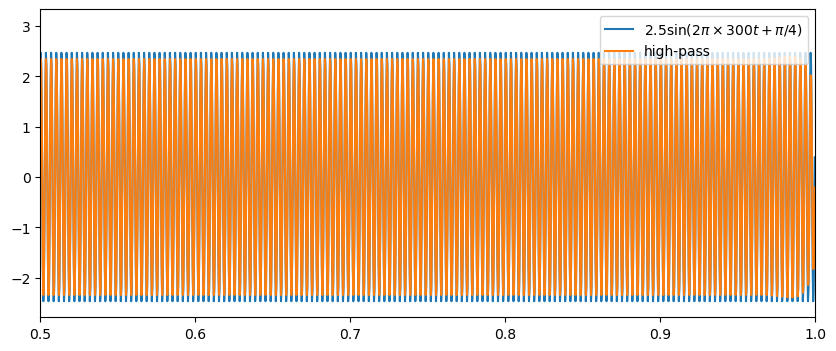

In [5]:
data=s1+s2+s3
f_cutoff=280
wn=2*f_cutoff/f_sam

b, a  =   signal.butter( 20 , wn,  'highpass' )    #配置滤波器 20 表示滤波器的阶数
filted_Data  =   signal.filtfilt(b, a, data)   #data为要过滤的信号


plt.figure(figsize=(10,4))
plt.plot(t,s3,label=r'$2.5 \sin(2 \pi \times 300 t+\pi/4)$')
plt.plot(t,filted_Data,label='high-pass')
plt.legend()
plt.xlim(0,0.1)


plt.figure(figsize=(10,4))
plt.plot(t,s3,label=r'$2.5 \sin(2 \pi \times 300 t+\pi/4)$')
plt.plot(t,filted_Data,label='high-pass')
plt.legend()
plt.xlim(0.5,1)

# 带通滤波器

(0.5, 1.0)

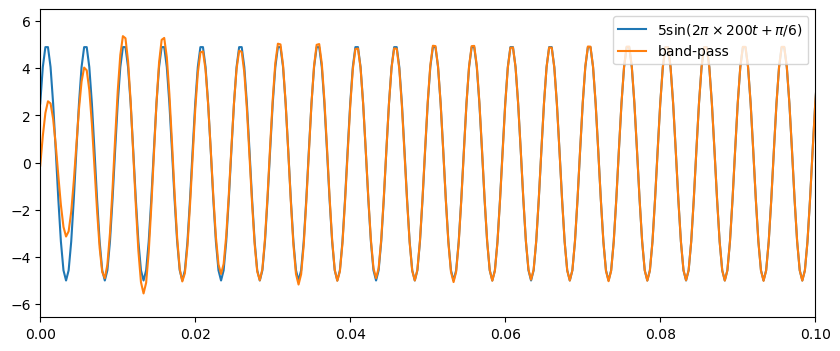

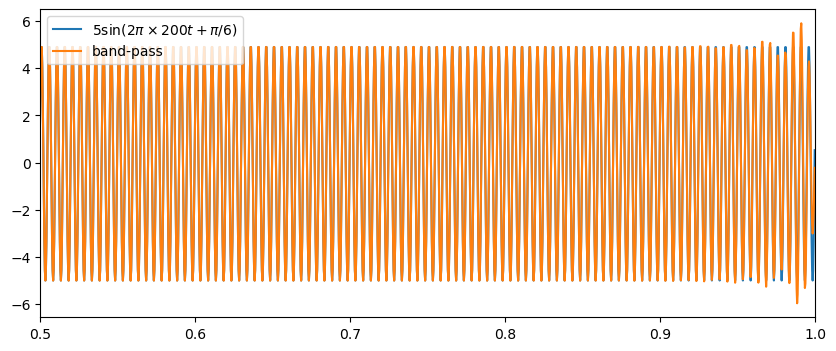

In [6]:
data=s1+s2+s3
f_cutoff1=150
wn1=2*f_cutoff1/f_sam

f_cutoff2=250
wn2=2*f_cutoff2/f_sam

b, a  =   signal.butter(8 , [wn1 , wn2 ],  'bandpass' )    #配置滤波器 8 表示滤波器的阶数
filted_Data =   signal.filtfilt(b, a, data)   #data为要过滤的信号


plt.figure(figsize=(10,4))
plt.plot(t,s2,label=r'$5 \sin(2 \pi \times 200 t+\pi/6)$')
plt.plot(t,filted_Data,label='band-pass')
plt.legend()
plt.xlim(0,0.1)


plt.figure(figsize=(10,4))
plt.plot(t,s2,label=r'$5 \sin(2 \pi \times 200 t+\pi/6)$')
plt.plot(t,filted_Data,label='band-pass')
plt.legend()
plt.xlim(0.5,1)

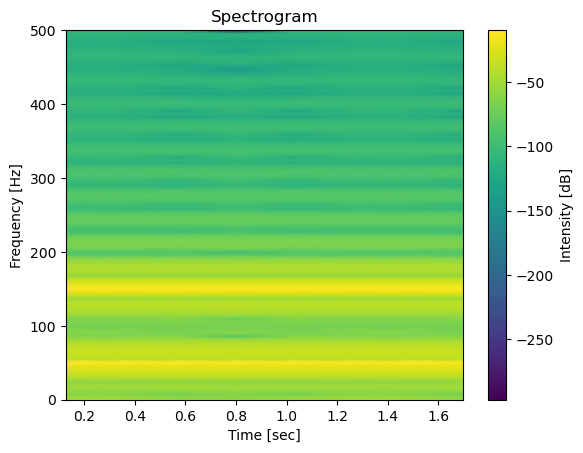

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# 生成示例信号
fs = 1000  # 采样频率
t = np.arange(0, 2, 1/fs)  # 时间向量
f1, f2 = 50, 150  # 两个频率成分
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)  # 合成信号

# 计算短时傅里叶变换
frequencies, times, Sxx = spectrogram(signal, fs)

# 绘制时频图
plt.pcolormesh(times, frequencies, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()

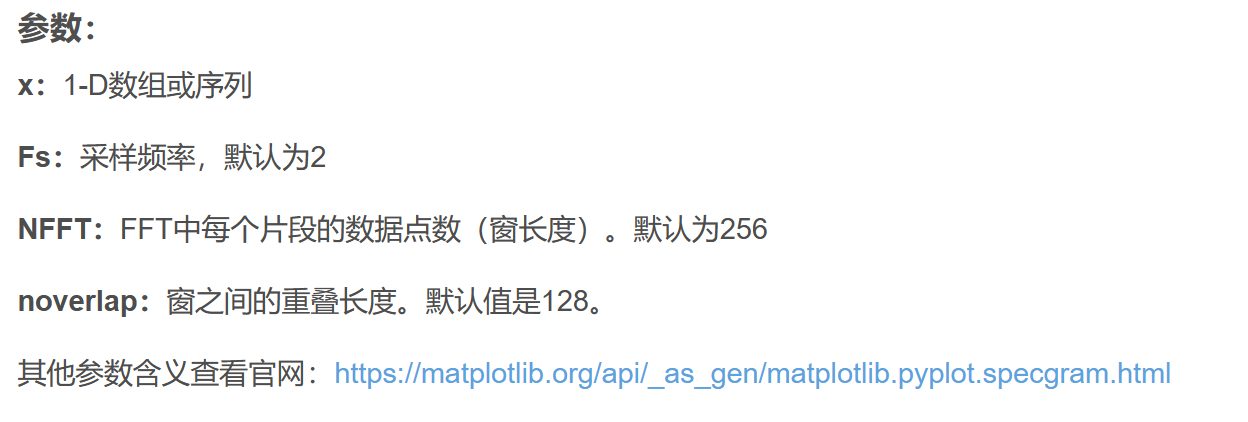

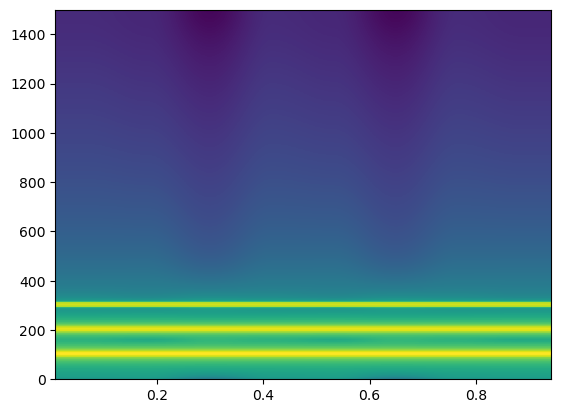

In [22]:
plt.specgram(data, NFFT=400, Fs=f_sam, noverlap=50)
plt.show()
